In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
# Load data yaha kaggle se Jo CSV download hogi wo utha lena
data = pd.read_csv('drug_recovery.csv')
df=data
df

,city,gender,age,bmi,sleep,days
0,mumbai,Male,60.0,20.18,6.74,15.52
1,mumbai,Female,51.0,20.25,9.00,18.19
2,Bangalore,Female,25.0,20.57,8.47,16.32
3,Mumbai,Female,33.0,20.25,8.43,16.70
4,mumbai,Male,67.0,20.63,8.23,16.77
...,...,...,...,...,...,...
9995,Mumbai,female,47.0,20.57,7.67,14.61
9996,Bangalore,Male,44.0,23.28,7.34,14.29
9997,Bangalore,female,58.0,23.22,6.17,16.16
9998,Bangalore,Male,50.0,19.41,5.12,22.54


### EDA and Data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    10000 non-null  object 
 1   gender  10000 non-null  object 
 2   age     9908 non-null   float64
 3   bmi     10000 non-null  float64
 4   sleep   10000 non-null  float64
 5   days    10000 non-null  float64
dtypes: float64(4), object(2)
memory usage: 468.9+ KB


In [4]:
df.describe(include="all")

,city,gender,age,bmi,sleep,days
count,10000,10000,9908.000000,10000.000000,10000.000000,10000.000000
unique,4,4,NaN,NaN,NaN,NaN
top,Mumbai,Male,NaN,NaN,NaN,NaN
freq,4026,3998,NaN,NaN,NaN,NaN
mean,NaN,NaN,50.562071,21.676711,6.999622,15.770061
std,NaN,NaN,44.020977,1.866919,1.173446,2.579236
min,NaN,NaN,18.000000,18.500000,5.000000,10.020000
25%,NaN,NaN,32.000000,20.050000,5.970000,13.920000
50%,NaN,NaN,47.000000,21.670000,6.980000,15.550000
75%,NaN,NaN,61.000000,23.280000,8.030000,17.490000


There is a difference between mean and median of age i.e. There are outliers

In [5]:
df=data
df.nunique()

city         4
gender       4
age         67
bmi        100
sleep      100
days      1247
dtype: int64

In [6]:
df.isnull().sum()

city       0
gender     0
age       92
bmi        0
sleep      0
days       0
dtype: int64

Here, We can see age column have missing values. Let's replace it by mean of age

In [7]:
print("Mean age  is ",np.mean(df.age))

Mean age  is  50.562071053693984


In [8]:
df.fillna({"age":np.mean(df.age)}, inplace=True)

In [9]:
print(df["gender"].unique())
print(df["city"].unique())

['Male' 'Female' 'female' 'male']
['mumbai' 'Bangalore' 'Mumbai' 'bangalore']


Here we can see that there are Two cities and two genders but duw to case sensitivity it is showing 4 unique. We will treat them.

In [10]:
df["gender"]=df.gender.str.lower()
df["city"]=df.city.str.lower()

<Axes: ylabel='days'>

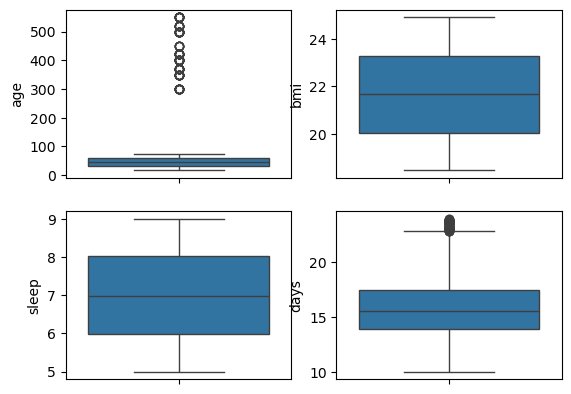

In [11]:
plt.figure()
plt.subplot(2,2,1)
sns.boxplot(df["age"])
plt.subplot(2,2,2)
sns.boxplot(df["bmi"])
plt.subplot(2,2,3)
sns.boxplot(df["sleep"])
plt.subplot(2,2,4)
sns.boxplot(df["days"])

In [12]:
q1= df.age.quantile(0.25)
q3= df.age.quantile(0.75)
iqr=q3-q1
lower_bound=q1 - 1.5*iqr
upper_bound=q3 + 1.5*iqr
df=df[(df.age>= lower_bound) & (df.age<=upper_bound)]

In [13]:
q1= df.days.quantile(0.25)
q3= df.days.quantile(0.75)
iqr=q3-q1
lower_bound=q1 - 1.5*iqr
upper_bound=q3 + 1.5*iqr
df=df[(df.days>= lower_bound) & (df.days<=upper_bound)]

<Axes: xlabel='gender', ylabel='count'>

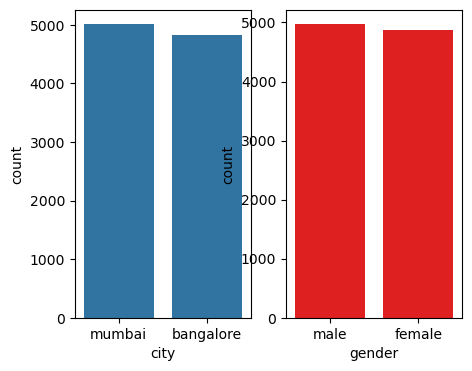

In [14]:
plt.figure(figsize=(5,4))
plt.subplot(1,2,1)
sns.countplot(x="city", data=df)
plt.subplot(1,2,2)
sns.countplot(x="gender", data=df, color="Red")

<Axes: ylabel='days'>

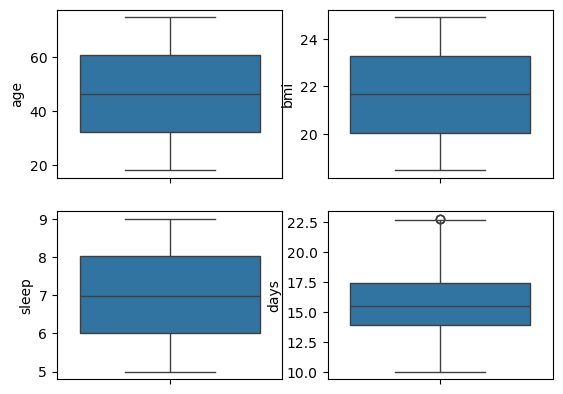

In [15]:
plt.figure()
plt.subplot(2,2,1)
sns.boxplot(df["age"])
plt.subplot(2,2,2)
sns.boxplot(df["bmi"])
plt.subplot(2,2,3)
sns.boxplot(df["sleep"])
plt.subplot(2,2,4)
sns.boxplot(df["days"])

<Axes: xlabel='days', ylabel='Count'>

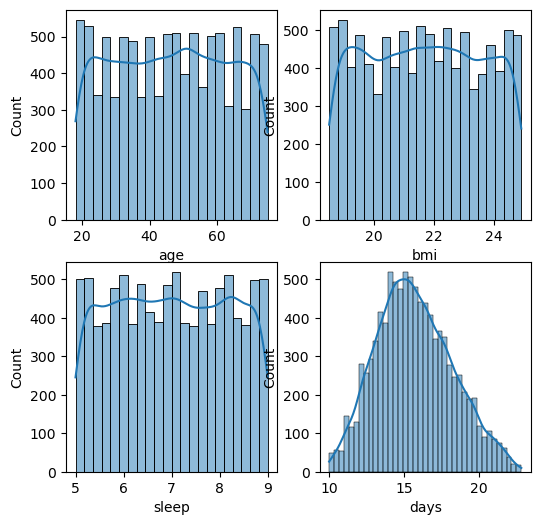

In [16]:
plt.figure(figsize=(6,6))
plt.subplot(2,2,1)
sns.histplot(df["age"],kde=True)
plt.subplot(2,2,2)
sns.histplot(df["bmi"],kde=True)
plt.subplot(2,2,3)
sns.histplot(df["sleep"],kde=True)
plt.subplot(2,2,4)
sns.histplot(df["days"],kde=True)

Here, We found that Number of males and females are equal. People are equal from both cities. 
There was some outliers in age and days column.
Days follows Normal distribution while age, BMI and sleep are uniqormally distributted.

### Hypothesis Test
We will go with two sample T test. Assuming level of significance 5%

In [17]:
male= df[df.gender=="male"]
female=df[df.gender=="female"]
t, p= ttest_ind(male.days, female.days)

In [18]:
if p < 0.05:
    print ('Since P-Value=',p , ",Null Hypothesis is rejected, We accept Alterive hypothesis i.e.There is an effect of Gender")
else:
    print('Since P-Value=',p , ", We failed to reject Null Hypothesis i.e. There is no effect of Gender")

Since P-Value= 0.5807149072076832 , We failed to reject Null Hypothesis i.e. There is no effect of Gender


In [19]:
df.city.unique()

array(['mumbai', 'bangalore'], dtype=object)

In [20]:
mum=df[df.city=="mumbai"]
blr=df[df.city=="bangalore"]

In [21]:
t, p= ttest_ind(mum.days, blr.days)

In [22]:
if p < 0.05:
    print ('Since P-Value=',p , ",We accept Alterive hypothesis i.e. There is an effect of City ")
else:
    print('Since P-Value=',p , ",We failed to reject Null Hypothesis i.e. There is no effect of City")

Since P-Value= 4.457368128746736e-99 ,We accept Alterive hypothesis i.e. There is an effect of City 


### Correlation Test

In [23]:
correlatiom=df.corr(numeric_only=True)

<Axes: >

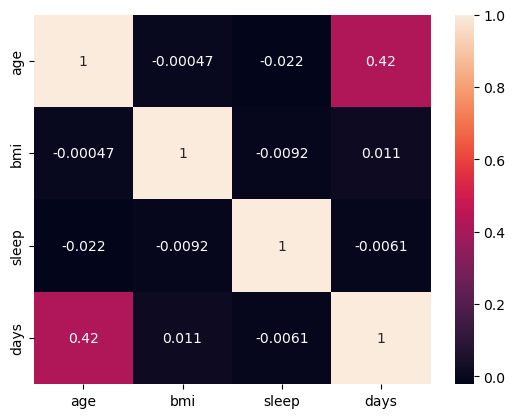

In [24]:
sns.heatmap(correlatiom,annot=True)

Here, We can see some moderate positive correlation between age and days of recovery.